In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Андрей\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Представление данных:

Данные состоят из двух классов, каждый из которых имеет двумерное равномерное распределение:

1.  **Класс 1:**
    •   **Распределение по X:** Равномерное распределение на интервале U(5, 20).
    •   **Распределение по Y:** Равномерное распределение на интервале U(40, 60).

2.  **Класс 2:**
    •   **Распределение по X:** Равномерное распределение на интервале U(20, 35).
    •   **Распределение по Y:** Равномерное распределение на интервале U(10, 30).


[11. 11. 17. 19.  9. 17. 14. 19.  8. 10.]


<Axes: xlabel='x', ylabel='y'>

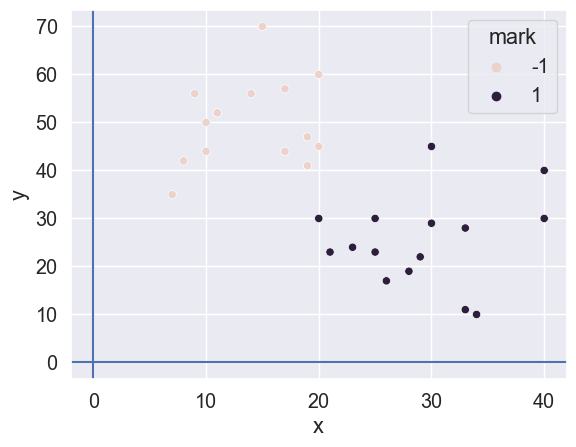

In [2]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
bugs = pd.read_csv('bugs2.csv', encoding='utf-8', delimiter=' ')
bugs = bugs.rename(columns={"Ширина": "x", "Длина": "y", "Насекомое": "mark"})
# print(bugs.head())
X_append = np.floor(np.random.rand(10)*15) + 5
Y_append = np.floor(np.random.rand(10)*20)+40
print(X_append)
df_append_first = pd.DataFrame({'x': X_append, 'y': Y_append, 'mark': -1})
bugs = pd.concat([bugs,df_append_first])

X_append = np.floor(np.random.rand(10)*15) + 20
Y_append = np.floor(np.random.rand(10)*20)+10
df_append_second = pd.DataFrame({'x': X_append, 'y': Y_append, 'mark': 1})
bugs = pd.concat([bugs,df_append_second])

plt.axhline(y=0)
plt.axvline(x=0)
sns.scatterplot(data=bugs, x="x", y="y", hue = "mark")


In [6]:
# Добавление единичного вектора к DataFrame с данными
bugs[['x', 'y']].to_numpy()
Points = bugs[['x', 'y']].to_numpy()
Points = np.c_[ Points,np.ones(Points.shape[0])]

In [7]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # SVM с линейным ядром
# rows = 
marks = list(bugs.mark)
clf.fit(Points, marks) # найти дуальные переменные и смещение,
#получить список опорных векторов
lin_clf = svm.LinearSVC() # SVM для линейно разделимой выборки
# можно непосредственно получить коэффициенты вектора w)
lin_clf.fit(Points, marks) # найти вектор w по обучающей выборке
v = clf.support_vectors_ # выделение опорных векторов
w = lin_clf.coef_[0] # коэффициенты линейной модели
b= clf.intercept_ # смещение
v,w, b
# сформировать графики для визуализации полученных результатов
# показать опорные вектора и разделяющую линию
# задать координаты нового объекта, по вектору w определить его класс

(array([[20., 45.,  1.],
        [20., 30.,  1.],
        [30., 45.,  1.]]),
 array([ 0.24371921, -0.13071307,  0.01218596]),
 array([1.]))

-  **w** - это **вектор весов (w0, w1, w2)**, полученный в результате обучения модели
-  **Средняя линия** представляет собой границу решения (decision boundary).  Она **разделяет** пространство на области, соответствующие разным классам.  Точки, используемые для отрисовки, вычисляются как пересечения этой линии с осями координат.
-  Вторая и третья линии представляют собой **маржинальные линии** (margin boundaries), если речь идет.  Они показывают "ширину" разделяющей полосы между классами.
-  Стрелки указывают на точки, задающие **опорные вектора**

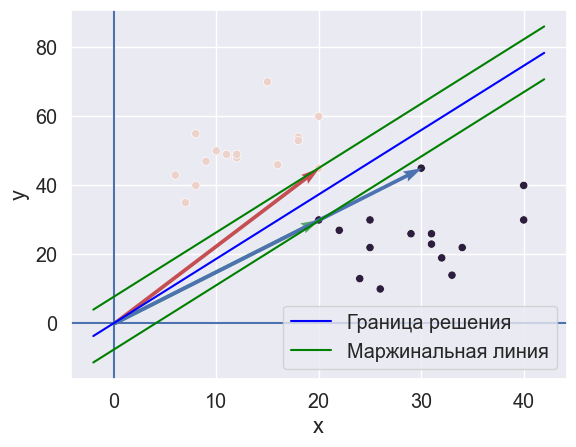

In [10]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
sns.scatterplot(data=bugs, x="x", y="y", hue = "mark")


plt.axhline(y=0)
plt.axvline(x=0)

plt.scatter
def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l

newline([0,-w[2]/w[1]],[-w[2]/w[0],0], 'blue') # в w0*x_i[0]+w1*x_i[1]+w2*1=0 поочередно
                                                        # подставляем x_i[0]=0, x_i[1]=0
newline([0,1/w[1]-w[2]/w[1]],[1/w[0]-w[2]/w[0],0], "green") #w0*x_i[0]+w1*x_i[1]+w2*1=1
newline([0,-1/w[1]-w[2]/w[1]],[-1/w[0]-w[2]/w[0],0], "green") #w0*x_i[0]+w1*x_i[1]+w2*1=-1

legend_elements = [Line2D([0], [0], color='blue', label='Граница решения'),
          Line2D([0], [0], color='green', label='Маржинальная линия')]

plt.legend(handles=legend_elements)

origin = [0], [0]
plt.quiver(*origin,  v[0][0], v[0][1], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin,  v[1][0], v[1][1], color='g', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin,  v[2][0], v[2][1], color='b', angles='xy', scale_units='xy', scale=1)

plt.show()



[[20. 45.]
 [20. 30.]
 [30. 45.]] [ 0.2        -0.13333333] [1.]


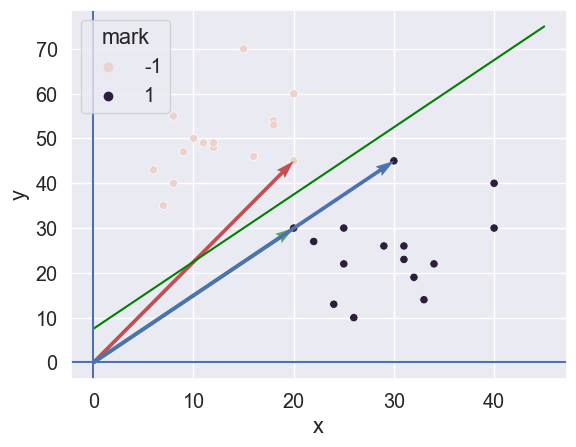

In [ ]:
# Через 2 координаты:
Points = bugs[['x', 'y']].values
# bugs['x'] = bugs['x'].apply(lambda x: x+10))
# bugs['y'] = bugs['y'].apply(lambda x: x+100)
# print(Points)

clf = svm.SVC(kernel='linear') # SVM с линейным ядром
clf.fit(list(zip(bugs['x'], bugs['y'])), bugs['mark'])
lin_clf = svm.LinearSVC()
lin_clf.fit(list(zip(bugs['x'], bugs['y'])), bugs['mark'])
v = clf.support_vectors_ # выделение опорных векторов
w = clf.coef_[0] # коэффициенты линейной модели
b= clf.intercept_
print(v, w, b)


# сформировать графики для визуализации полученных результатов
# показать опорные вектора и разделяющую линию
# задать координаты нового объекта, по вектору w определить его класс
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
sns.scatterplot(data=bugs, x="x", y="y", hue = "mark")

x = np.linspace(0, 45, 5)
# plt.plot(x, x * (-w[0]/w[1])+1/w[1], color = 'red')
plt.plot(x, x * (-w[0]/w[1])-b/w[1], color = 'green')
# plt.plot(x, x * (-w[0]/w[1]), color = 'b')

plt.axhline(y=0)
plt.axvline(x=0)

plt.scatter
def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l


origin = [0], [0]
plt.quiver(*origin,  v[0][0], v[0][1], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin,  v[1][0], v[1][1], color='g', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin,  v[2][0], v[2][1], color='b', angles='xy', scale_units='xy', scale=1)

plt.show()


## Попробуем по обученной модели предугадать точки:

    x   y  mark
0  10  10     1
1  25  30     1
2  15  40    -1


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([ 1,  1, -1], dtype=int64)

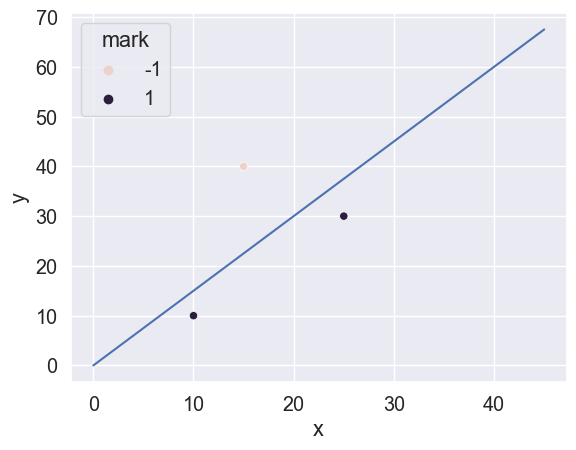

In [16]:
#предугадаем точки:


new_points = pd.DataFrame(np.array([[10,10,1], [25,30,1], [15,40,-1]]),columns=['x','y','mark'])
print(new_points)
sns.scatterplot(data=new_points, x="x", y="y", hue="mark")

x = np.linspace(0, 45, 5)
plt.plot(x, x * (-w[0]/w[1]), color = 'b')
clf.predict(new_points[['x','y']])
#Видим, что определяет правильно

# Модель SVM с выбросами в данных

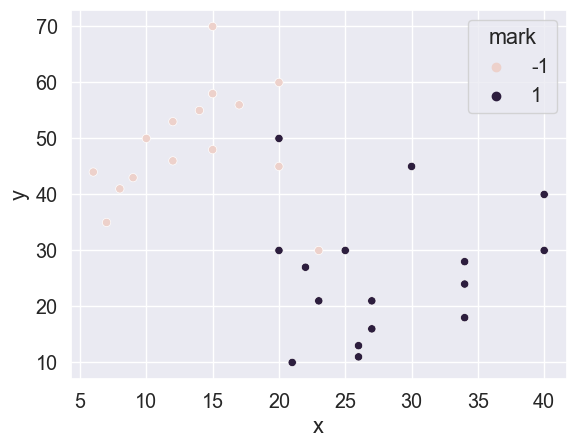

In [ ]:
from sklearn import svm
# добавить ошибочные объекты
fault_points = pd.DataFrame(np.array([[20,50,1], [23,30,-1]]),columns=['x','y','mark'])
bugs = pd.concat([bugs, fault_points])
sns.scatterplot(data=bugs, x="x", y="y", hue = 'mark')
clf = svm.SVC(kernel='linear') # SVM с линейным ядром
# clf.fit(x_train, y_train) # найти дуальные переменные и смещение,
#получить список опорных векторов
# y_pr = clf.predict(x_train) # проверка на обучающей выборке
# v = clf.support_vectors_ # выделение опорных векторов
# сформировать графики для визуализации полученных результатов
# показать опорные вектора и выделить из них выбросы
# задать координаты нового объекта определить его класс с помощью
# clf.predict
# без помощи clf.predict определить класс нового объекта через атрибуты
# dual_coef_ (λ умноженные на знак класса) и intercept_ (смещение)
# показать разделяющую линию

In [ ]:
clf = svm.SVC(kernel='linear') # SVM с линейным ядром
Points = bugs[['x', 'y']].values
clf.fit(Points, bugs['mark'])
# y_pr = clf.predict(list(zip(df_n['x'], df_n['y'])))
v2 = clf.support_vectors_
w2 = clf.coef_[0]
b2 = clf.intercept_ 

# clf = svm.SVC(kernel='linear') # SVM с линейным ядром
# clf.fit(list(zip(bugs['x'], bugs['y'])), bugs['mark'])
# v2 = clf.support_vectors_ # выделение опорных векторов
# lin_clf = svm.LinearSVC()
# lin_clf.fit(list(zip(bugs['x'], bugs['y'])),bugs['mark'])
# w2 = lin_clf.coef_[0] # коэффициенты линейной модели
# b2= clf.intercept_
print(v2, w2, b2)
marks = []
for i in range(len(v2)):
    marks.append(bugs.loc[((bugs['x'] == v2[i][0]) & (bugs['y'] == v2[i][1]))].iloc[0]['mark'])
v_new=[]
lmbda_new=[]
lmbda = clf.dual_coef_[0]
C = 1
for i in range(len(v2)):
    if (np.sign(np.dot(w2, v2[i])+b2) * marks[i] == 1 and abs(lmbda[i]) <= C):
#         print(lmbda[i])
        lmbda_new.append(lmbda[i])
        v_new.append(v2[i])
#         marks.append(marks[i])
marks, lmbda, v2, C
# выводим лямбда - дуальные коэффициенты, опорные вектора, константу C

[[20. 45.]
 [15. 48.]
 [23. 30.]
 [20. 30.]
 [30. 45.]
 [22. 27.]
 [20. 50.]] [ 0.12249089 -0.0544078 ] [-0.22598455]


([-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0],
 array([-1.        , -0.32870782, -1.        ,  1.        ,  0.10269202,
         0.2260158 ,  1.        ]),
 array([[20., 45.],
        [15., 48.],
        [23., 30.],
        [20., 30.],
        [30., 45.],
        [22., 27.],
        [20., 50.]]),
 1)

### Стрелки задают все **опорные вектора**

[-1.         -0.32870782 -1.          1.          0.10269202  0.2260158
  1.        ]
[[20. 15. 23. 20. 30. 22. 20.]
 [45. 48. 30. 30. 45. 27. 50.]]
['r', 'g', 'b', 'y', 'pink', 'brown', 'black']


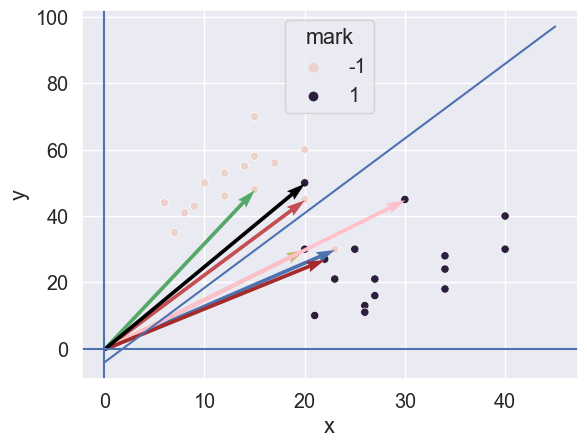

In [ ]:
sns.scatterplot(bugs, x = 'x', y = 'y', hue = 'mark')
colors = ['r', 'g', 'b', 'y', 'pink', 'brown', 'black']
origin = [0], [0]
print(lmbda)
print(v2.T)
print(colors)
for i in range(len(v2)):
    plt.quiver(*origin,  v2[i][0], v2[i][1], color=colors[i], angles='xy', scale_units='xy', scale=1)
plt.plot(x, x * (-w2[0]/w2[1])-b2/w2[1])
plt.axhline(y=0)
plt.axvline(x=0)
plt.show()
# выводим все опорные вектора, если написало цветов colors недостаточно - то перезапустить

### Стрелки задают не ошибочные **опорные вектора**

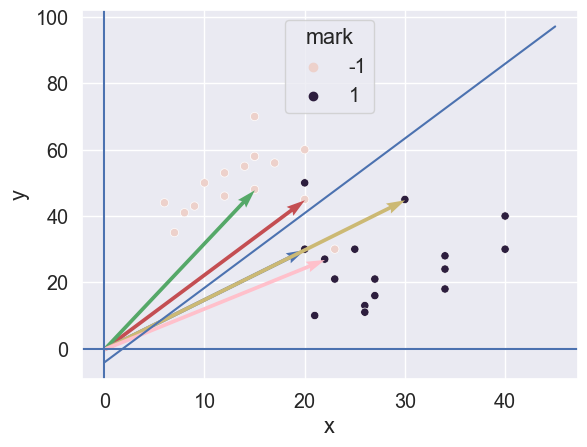

In [ ]:
sns.scatterplot(bugs, x = 'x', y = 'y', hue = 'mark')
colors = ['r', 'g', 'b', 'y', 'pink', 'brown', 'black']
origin = [0], [0]
for i in range(len(v_new)):
    plt.quiver(*origin,  v_new[i][0], v_new[i][1], color=colors[i], angles='xy', scale_units='xy', scale=1)
plt.plot(x, x * (-w2[0]/w2[1])-b2/w2[1])
plt.axhline(y=0)
plt.axvline(x=0)
plt.show()

#выводим все опорные вектора, кроме ошибочных

## Попробуем по модели, обученной на данных с выбросами, предугадать точки:

[ 0.2        -0.13333333] [10, 10]
Для точки  [10,10]	[0.45484635]
Для точки  [25,30]	[1.20405369]
Для точки  [15,40]	[-0.56493318]


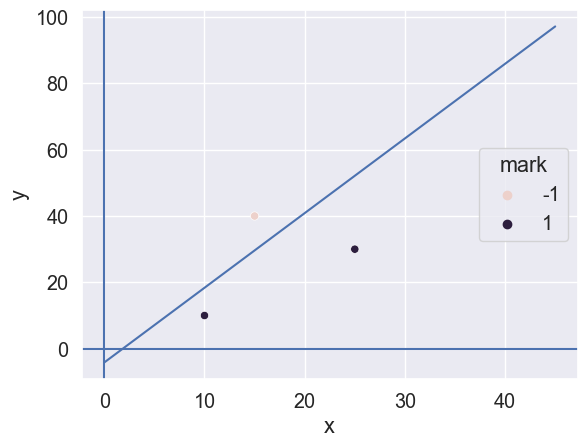

In [ ]:
def a(lambds, Points, x, intercept):
    result = 0
    for i in range(len(Points)):
#         result+=(lambds[i]*marks[i]*np.dot(x,Points[i]))
        result+=(lambds[i]*np.dot(x,Points[i]))
#         print(result)
    result+=intercept
#     print(result)
    return result
# tmp_point = [10,0]
# # print(lmbda,'\n',v2,tmp_point,b2)
# # a(lmbda,v2,list(bugs['mark']),[40,50],b2)

# # # clf.predict([[40,50]])


new_points = pd.DataFrame(np.array([[10,10,1], [25,30,1], [15,40,-1]]),columns=['x','y','mark'])
print(w,list(new_points.iloc[0][:-1]))

# def a(w, x, intercept):
#     result = 0
#     result+=np.dot(x,w)
#     result+=intercept
#     print(result)
#     return np.sign(result)
# print(list(new_points['mark']))
# for i in range(len(new_points)):
#     print(a(lmbda,list(new_points.iloc[i][:-1]),b2))
print("Для точки  [10,10]",end = '\t')
print(a(lmbda, v2, [10,10],b2))
print("Для точки  [25,30]",end = '\t')
print(a(lmbda, v2, [25,30],b2))
print("Для точки  [15,40]",end = '\t')
print(a(lmbda, v2, [15,40],b2))


plt.plot(x, x * (-w2[0]/w2[1])-b2/w2[1])
# plt.scatter([10,25,15],[10,30,40])
sns.scatterplot(data = new_points, x="x", y="y", hue = "mark")
plt.axhline(y=0)
plt.axvline(x=0)
plt.show()
